
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
sex_series = data['sex'].value_counts()
sex_series

Male      21790
Female    10771
Name: sex, dtype: int64

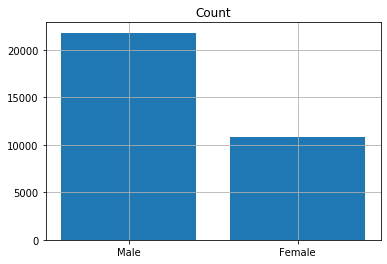

In [4]:
plt.bar(sex_series.index, sex_series)
plt.title('Count')
plt.grid(True)

**2. Каков средний возраст (признак *age*) женщин?**

In [5]:
w_mean = data.loc[data['sex'] == 'Female']['age'].mean()
print(f'средний возраст у женщин: {w_mean}')

средний возраст у женщин: 36.85823043357163


**3. Какова доля граждан Германии (признак *native-country*)?**

In [6]:
g_mean = data['native-country'].value_counts(normalize=True)['Germany']
print(f'доля граждан Германии: {g_mean}')

доля граждан Германии: 0.004207487485028101


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

In [7]:
edct_series = data['education'].value_counts()

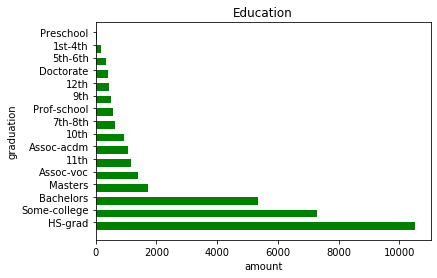

In [8]:
import numpy as np
x = edct_series.index
y = edct_series

fig, ax = plt.subplots()    
width = 0.6 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Education')
plt.xlabel('amount')
plt.ylabel('graduation');    
#plt.show()

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год?**

In [9]:
low_m = data.loc[data['salary'] == '<=50K']['age'].mean()
high_m = data.loc[data['salary'] == '>50K']['age'].mean()
low_st = data.loc[data['salary'] == '<=50K']['age'].std()
high_st = data.loc[data['salary'] == '>50K']['age'].std()

In [10]:
print(f'среднее значение возраста для <=50K: {low_m}')
print(f'среднее значение возраста для >50K: {high_m}')
print(f'среднеквадратичное отклонение возраста для <=50K: {low_st}')
print(f'среднеквадратичное отклонение возраста для >50K: {high_st}')

среднее значение возраста для <=50K: 36.78373786407767
среднее значение возраста для >50K: 44.24984058155847
среднеквадратичное отклонение возраста для <=50K: 14.020088490824813
среднеквадратичное отклонение возраста для >50K: 10.51902771985177


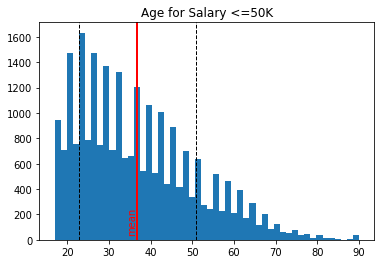

In [11]:
xx = data.loc[data['salary'] == '<=50K']['age']
plt.hist(xx, bins=50)
plt.axvline(xx.mean(), color='r', linestyle='solid', linewidth=2, label='mean')
plt.text(xx.mean()-2.5, 50,'mean', rotation=90, color='r')
plt.axvline((xx.mean() + xx.std()), color='k', linestyle='--', linewidth=1)
plt.axvline((xx.mean() - xx.std()), color='k', linestyle='--', linewidth=1)
plt.gca().set(title='Age for Salary <=50K');

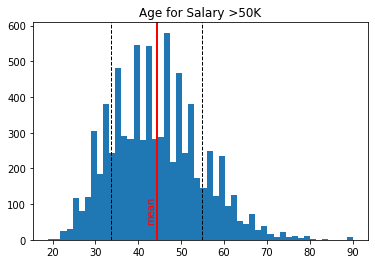

In [12]:
xx = data.loc[data['salary'] == '>50K']['age']
plt.hist(xx, bins=50)
plt.axvline(xx.mean(), color='r', linestyle='solid', linewidth=2, label='mean')
plt.text(xx.mean()-2.5, 50,'mean', rotation=90, color='r')
plt.axvline((xx.mean() + xx.std()), color='k', linestyle='--', linewidth=1)
plt.axvline((xx.mean() - xx.std()), color='k', linestyle='--', linewidth=1)
plt.gca().set(title='Age for Salary >50K');

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [13]:
ed = data.loc[data['salary'] == '>50K']['education']
ed_ref = ('Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate')
if sorted(ed_ref) == sorted(set(ed)):
    print('Это правда')
else:
    print('Это не так')

Это не так


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [14]:
dd = data.groupby(['sex','race'])[['age']]
dd.describe()

age                                          \
                             count       mean        std   min   25%   50%   
sex    race                                                                  
Female Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
       Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
       Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
       Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
       White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
Male   Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
       Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
       Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
       Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
       White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                        
                             75%   max  
sex    race                             
Female Amer-Indian-Eskimo  46.00  80.0  
       Asian-Pac-Islander  43.75  75.0  
       Black               46.00  90.0  
       Other               39.00  74.0  
       White               46.00  90.0  
Male   Amer-Indian-Eskimo  45.00  82.0  
       Asian-Pac-Islander  46.00  90.0  
       Black               46.00  90.0  
       Other               42.00  77.0  
       White               49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [15]:
df = data[data.salary == '>50K']
df_a = df[df.sex == 'Male']
mrtl_count = len(df_a.loc[df_a['marital-status'].isin(['Married-civ-spouse', 
                                                       'Married-spouse-absent', 
                                                       'Married-AF-spouse'])].index)
nmrtl_count = len(df_a.loc[~df_a['marital-status'].isin(['Married-civ-spouse', 
                                                         'Married-spouse-absent', 
                                                         'Married-AF-spouse'])].index)
print('Для мужского пола зарабатывающих много (>50K):')
print(f'{mrtl_count} - количество женатых')
print(f'{nmrtl_count} - количество холостых')

Для мужского пола зарабатывающих много (>50K):
5965 - количество женатых
697 - количество холостых


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [16]:
h_max = data['hours-per-week'].max()
n_max = data[data['hours-per-week'] == h_max].shape[0]
p_max = (float(data[(data['hours-per-week'] == h_max) & (data['salary'] == '>50K')].shape[0]) / n_max) * 100

In [21]:
print(f'{h_max} - максимальное число часов, которое человек работает в неделю')
print(f'{n_max} - количество таких людей')
print(f'{p_max}% - процент зарабатывающих много')

99 - максимальное число часов, которое человек работает в неделю
85 - количество таких людей
29.411764705882355 % - процент зарабатывающих много


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [62]:
for a,sub_df in data.groupby(["native-country","salary"]):
    mm = round(sub_df['hours-per-week'].mean(),2)
    ss = f'|{a[0]:26}|{a[1]:>5}|{mm:>8}|'
    print(ss)
    print('—'*43)

|?                         |<=50K|   40.16|
———————————————————————————————————————————
|?                         | >50K|   45.55|
———————————————————————————————————————————
|Cambodia                  |<=50K|   41.42|
———————————————————————————————————————————
|Cambodia                  | >50K|    40.0|
———————————————————————————————————————————
|Canada                    |<=50K|   37.91|
———————————————————————————————————————————
|Canada                    | >50K|   45.64|
———————————————————————————————————————————
|China                     |<=50K|   37.38|
———————————————————————————————————————————
|China                     | >50K|    38.9|
———————————————————————————————————————————
|Columbia                  |<=50K|   38.68|
———————————————————————————————————————————
|Columbia                  | >50K|    50.0|
———————————————————————————————————————————
|Cuba                      |<=50K|   37.99|
———————————————————————————————————————————
|Cuba                      | >50